In [1]:
import pandas as pd

file_path = 'adult22.csv'
df = pd.read_csv(file_path)

selected_columns = ['MIEV_A', 'FRJUICTP_A', 'COFFEENOTP_A', 'SALADTP_A', 'FRIESTP_A', 'BEANSTP_A', 'PIZZATP_A', 'OVEGTP_A']
df_selected = df[selected_columns]

df_selected = df_selected[~df_selected['MIEV_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['FRJUICTP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['COFFEENOTP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['SALADTP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['FRIESTP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['BEANSTP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['PIZZATP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['OVEGTP_A'].isin([7, 8, 9])]

df_selected['MIEV_A'].replace({2: 0}, inplace=True)
df_selected.replace({
    'FRJUICTP_A': {1: 3, 3: 1},
    'COFFEENOTP_A': {1: 3, 3: 1},
    'SALADTP_A': {1: 3, 3: 1},
    'FRIESTP_A': {1: 3, 3: 1},
    'BEANSTP_A': {1: 3, 3: 1},
    'PIZZATP_A': {1: 3, 3: 1},
    'OVEGTP_A': {1: 3, 3: 1},
}, inplace=True)

X = df_selected.drop(columns=['MIEV_A'])
y = df_selected['MIEV_A']

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {title}')
    plt.show()

def plot_feature_importance(importance_df, title):
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Feature Importance: {title}')
    plt.show()
    
    
def plot_kmeans_clusters(X_test, y_pred, title):
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'K-means Clusters: {title}')
    plt.show()

In [4]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

# Descriptive Statistics

In [5]:
print(df_selected.describe())

             MIEV_A    FRJUICTP_A  COFFEENOTP_A     SALADTP_A     FRIESTP_A  \
count  26316.000000  26316.000000  26316.000000  26316.000000  26316.000000   
mean       0.036252      1.000608      1.214052      1.758854      1.228834   
std        0.186919      1.077184      1.300364      0.865179      0.795005   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      1.000000      1.000000   
50%        0.000000      1.000000      1.000000      2.000000      1.000000   
75%        0.000000      2.000000      3.000000      2.000000      2.000000   
max        1.000000      3.000000      3.000000      3.000000      3.000000   

          BEANSTP_A     PIZZATP_A      OVEGTP_A  
count  26316.000000  26316.000000  26316.000000  
mean       1.153557      1.045980      2.120687  
std        0.834659      0.651235      0.837209  
min        0.000000      0.000000      0.000000  
25%        1.000000      1.000000     

# Correlation Analysis

                MIEV_A  FRJUICTP_A  COFFEENOTP_A  SALADTP_A  FRIESTP_A  \
MIEV_A        1.000000    0.009893     -0.003628  -0.032885  -0.012098   
FRJUICTP_A    0.009893    1.000000      0.094996   0.058670   0.128036   
COFFEENOTP_A -0.003628    0.094996      1.000000   0.063075   0.077377   
SALADTP_A    -0.032885    0.058670      0.063075   1.000000   0.024485   
FRIESTP_A    -0.012098    0.128036      0.077377   0.024485   1.000000   
BEANSTP_A     0.007674    0.120483      0.085851   0.139162   0.134540   
PIZZATP_A    -0.038668    0.071304      0.048060   0.019342   0.320027   
OVEGTP_A     -0.019702    0.053813      0.050934   0.375737   0.017141   

              BEANSTP_A  PIZZATP_A  OVEGTP_A  
MIEV_A         0.007674  -0.038668 -0.019702  
FRJUICTP_A     0.120483   0.071304  0.053813  
COFFEENOTP_A   0.085851   0.048060  0.050934  
SALADTP_A      0.139162   0.019342  0.375737  
FRIESTP_A      0.134540   0.320027  0.017141  
BEANSTP_A      1.000000   0.094045  0.138853  
PIZZ

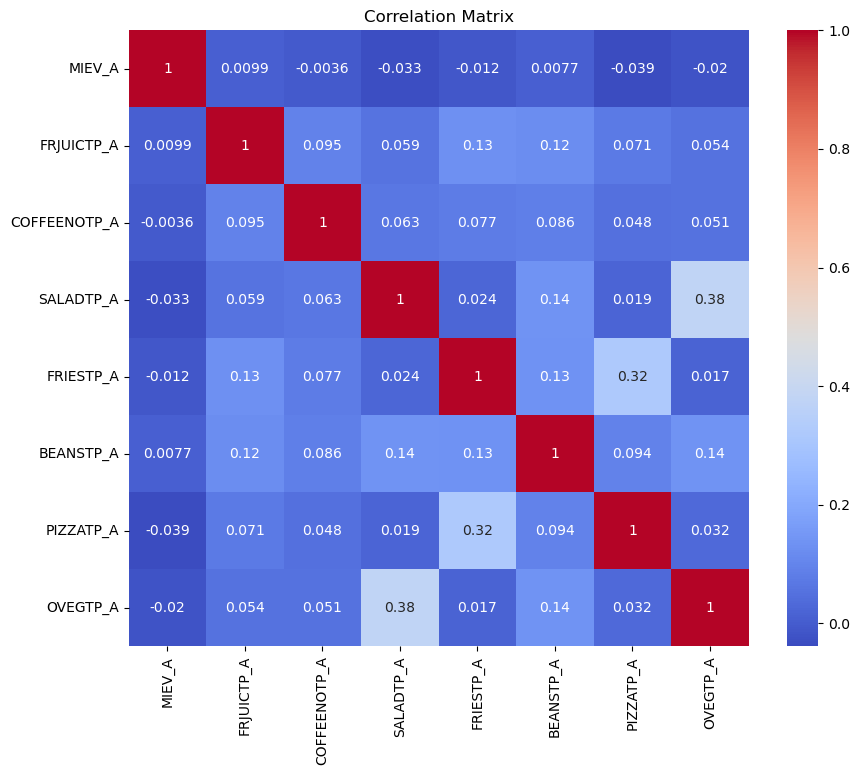

In [6]:
correlation_matrix = df_selected.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Hypothesis Testing

In [7]:
from scipy.stats import ttest_ind

heart_disease = df_selected[df_selected['MIEV_A'] == 1]['FRJUICTP_A']
no_heart_disease = df_selected[df_selected['MIEV_A'] == 0]['FRJUICTP_A']

t_stat, p_value = ttest_ind(heart_disease, no_heart_disease)

print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: 1.6049581101501948, P-value: 0.10851502401644621


# KNN

KNN
accuracy: 0.9656155015197568
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5086
           1       0.00      0.00      0.00       178

    accuracy                           0.97      5264
   macro avg       0.48      0.50      0.49      5264
weighted avg       0.93      0.97      0.95      5264



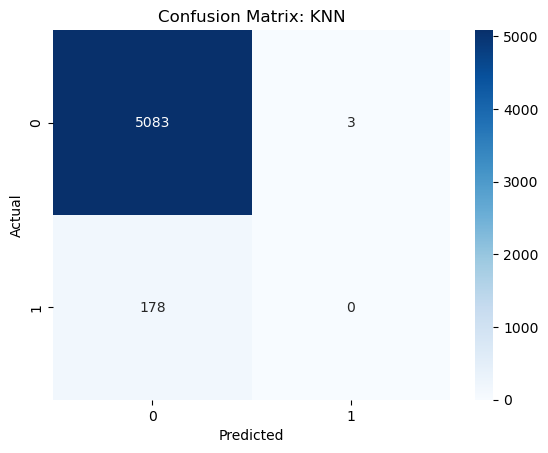

In [8]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN")
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))

plot_confusion_matrix(y_test, y_pred, 'KNN')

# K-means

K-means
accuracy: 0.5756079027355623
              precision    recall  f1-score   support

           0       0.97      0.58      0.73      5086
           1       0.04      0.45      0.07       178

    accuracy                           0.58      5264
   macro avg       0.50      0.51      0.40      5264
weighted avg       0.94      0.58      0.70      5264



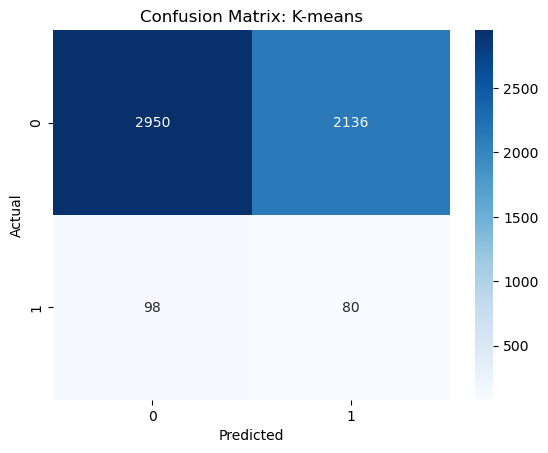

In [9]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X_train)
y_pred = kmeans.predict(X_test)
print("K-means")
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))

plot_confusion_matrix(y_test, y_pred, 'K-means')

# Decision Tree

Decision Tree
accuracy: 0.9612462006079028
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5086
           1       0.04      0.01      0.01       178

    accuracy                           0.96      5264
   macro avg       0.50      0.50      0.49      5264
weighted avg       0.93      0.96      0.95      5264



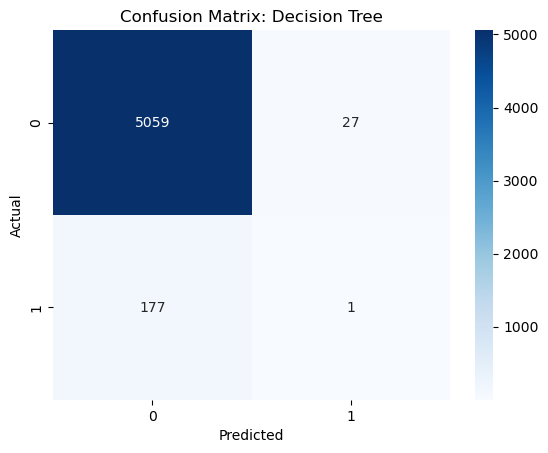

In [10]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree")
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))
plot_confusion_matrix(y_test, y_pred, 'Decision Tree')

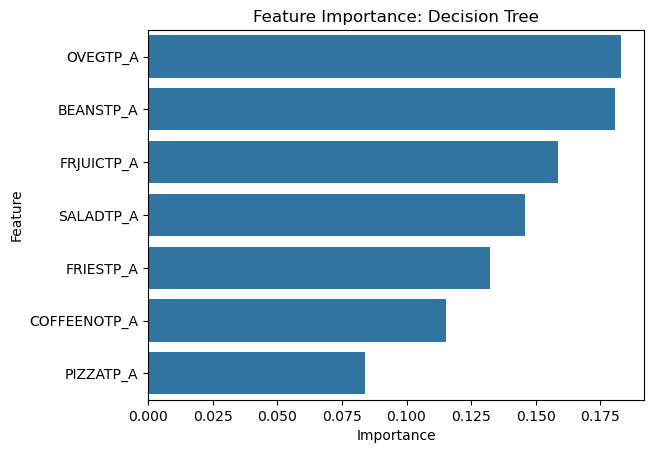

In [11]:
dt_importances = dt.feature_importances_
dt_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': dt_importances})
plot_feature_importance(dt_importance_df, 'Decision Tree')

# Random Forest

Random Forest
accuracy: 0.9621960486322189
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5086
           1       0.04      0.01      0.01       178

    accuracy                           0.96      5264
   macro avg       0.50      0.50      0.50      5264
weighted avg       0.94      0.96      0.95      5264



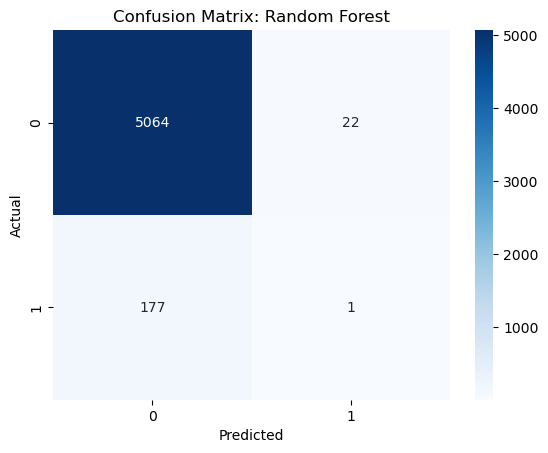

In [12]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest")
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))
plot_confusion_matrix(y_test, y_pred, 'Random Forest')

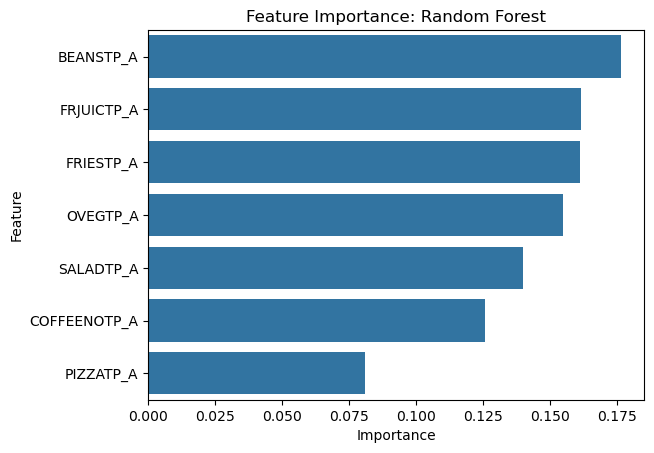

In [13]:
rf_importances = rf.feature_importances_
rf_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importances})
plot_feature_importance(rf_importance_df, 'Random Forest')

# CatBoost

CatBoost
accuracy: 0.96580547112462
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5086
           1       0.25      0.01      0.01       178

    accuracy                           0.97      5264
   macro avg       0.61      0.50      0.50      5264
weighted avg       0.94      0.97      0.95      5264



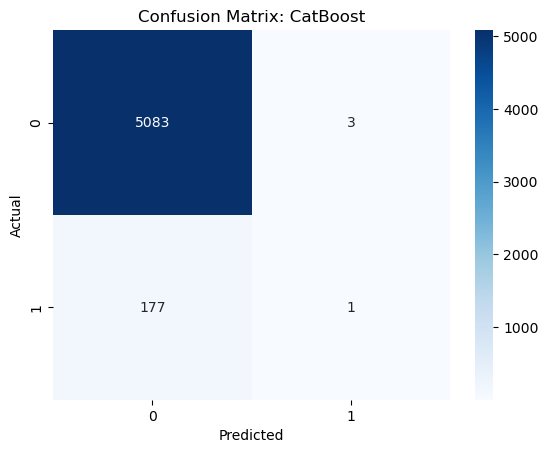

In [14]:
catboost = CatBoostClassifier(verbose=0)
catboost.fit(X_train, y_train)
y_pred = catboost.predict(X_test)
print("CatBoost")
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))
plot_confusion_matrix(y_test, y_pred, 'CatBoost')

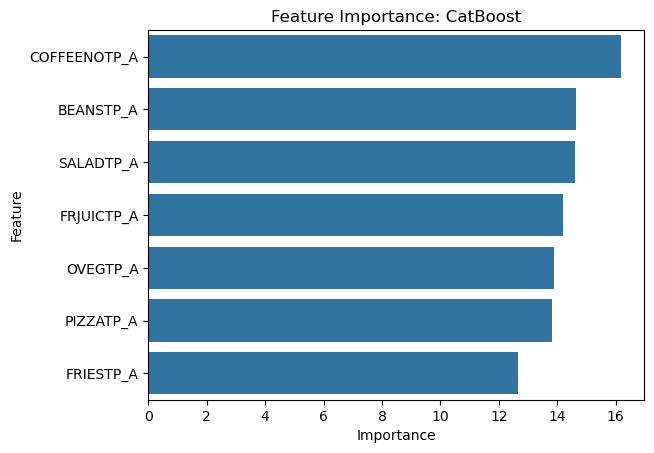

In [15]:
catboost_importances = catboost.get_feature_importance()
catboost_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': catboost_importances})
plot_feature_importance(catboost_importance_df, 'CatBoost')

# Logistic Regression

        Feature  Coefficient Correlation
0    FRJUICTP_A     0.089844    Positive
4     BEANSTP_A     0.084452    Positive
1  COFFEENOTP_A    -0.017306    Negative
3     FRIESTP_A    -0.020393    Negative
6      OVEGTP_A    -0.074612    Negative
2     SALADTP_A    -0.167934    Negative
5     PIZZATP_A    -0.360358    Negative


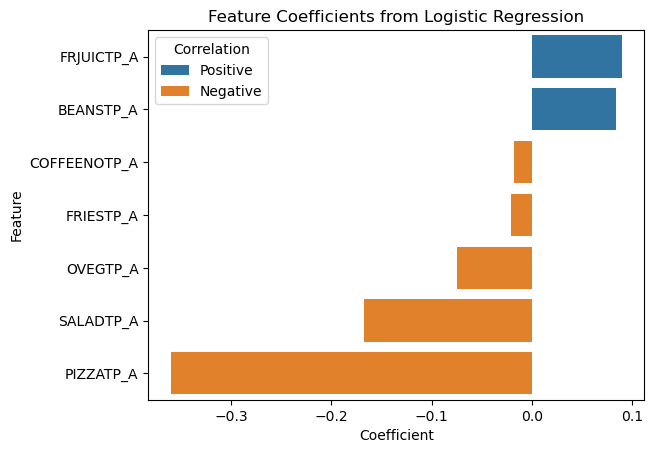

In [16]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
coefficients = log_reg.coef_[0]
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
coef_df['Correlation'] = coef_df['Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df.sort_values(by='Coefficient', ascending=False))
sns.barplot(x='Coefficient', y='Feature', hue='Correlation', data=coef_df)
plt.title('Feature Coefficients from Logistic Regression')
plt.show()